In [214]:
import numpy as np
from numpy.random import gamma, poisson
import pystan
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import itertools

In [224]:
N = 100
I = 10
x = np.zeros((N,I))

K_2 = 2
K_1 = 4

alpha_w0 = alpha_w1 = 0.3
beta_w0  = beta_w1  = 0.5
alpha_z2 = alpha_z1 = 0.3
beta_z2  = 0.5

W_1 = np.zeros((K_2, K_1))
W_0 = np.zeros((K_1, I))

z_2 = np.zeros((N, K_2))
z_1 = np.zeros((N, K_1))

27


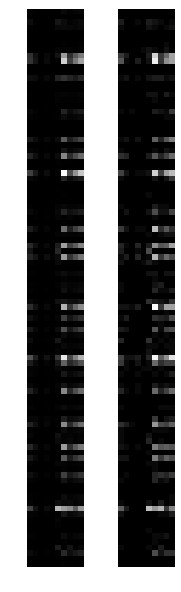

In [225]:
W_1 = gamma(shape=alpha_w1, scale=1/beta_w1, size=(K_2, K_1))
W_0 = gamma(shape=alpha_w0, scale=1/beta_w0, size=(K_1, I))

z_2 = gamma(shape=alpha_z2, scale=1/beta_z2, size=(N,K_2))
z_1 = gamma(shape=alpha_z1, scale=1/(alpha_z1/np.dot(z_2, W_1)), size=(N,K_1))

x   = poisson(lam=np.dot(z_1, W_0), size=(N,I))

fi = plt.figure(figsize=(3,10))
ax = plt.subplot(1,2,1)
ax.axis('off')
ax.imshow(np.dot(z_1, W_0), interpolation='nearest', cmap=plt.cm.gray)
ax = plt.subplot(1,2,2)
ax.axis('off')
ax.imshow(x, interpolation='nearest', cmap=plt.cm.gray)
print np.max(x)


In [226]:
data = {
    'N': N, 
    'I': I, 
    'x': x,
    'K_2': K_2,
    'K_1': K_1,
    'alpha_w1': alpha_w1,
    'alpha_w0': alpha_w0,
    'beta_w1': beta_w1,
    'beta_w0': beta_w0,
    'alpha_z2': alpha_z2,
    'beta_z2': beta_z2,
    'alpha_z1': alpha_z1,
    }
pystan.misc.stan_rdump(data, "sparse_gamma_def.data.R")

In [227]:
results = np.genfromtxt('output.csv', delimiter=',')[1,1:]
print results.shape

(648,)


In [228]:
# z_1_ = np.reshape(results[0:N*K_1], (N,K_1), order='F')
# z_2_ = np.reshape(results[N*K_1 : N*K_1+N*K_2], (N,K_2), order='F')
# W_0_ = np.reshape(results[N*K_1+N*K_2+N*K_3 : N*K_1+N*K_2+N*K_3+K_1*I], (K_1,I), order='F')

z_2_ = np.reshape(results[0:N*K_2], (N,K_2), order='F')
z_1_ = np.reshape(results[N*K_2 : N*K_2+N*K_1], (N,K_1), order='F')
W_1_ = np.reshape(results[N*K_2+N*K_1 : N*K_2+N*K_1+K_2*K_1], (K_2,K_1), order='F')
W_0_ = np.reshape(results[N*K_2+N*K_1+K_2*K_1 : N*K_2+N*K_1+K_2*K_1+K_1*I], (K_1,I), order='F')


3.24198550824
9.00658


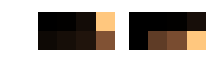

In [229]:
fi = plt.figure(figsize=(3,20))
ax = plt.subplot(1,2,1)
ax.axis('off')
ax.imshow(np.sort(W_1), interpolation='nearest', cmap=plt.cm.copper)
ax = plt.subplot(1,2,2)
ax.axis('off')
ax.imshow(np.sort(W_1_), interpolation='nearest', cmap=plt.cm.copper)
print np.max(W_1)
print np.max(W_1_)

1.74464921993
10.5909


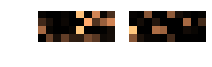

In [230]:
fi = plt.figure(figsize=(3,20))
ax = plt.subplot(1,2,1)
ax.axis('off')
ax.imshow((W_0), interpolation='nearest', cmap=plt.cm.copper)
ax = plt.subplot(1,2,2)
ax.axis('off')
ax.imshow((W_0_), interpolation='nearest', cmap=plt.cm.copper)
print np.max(W_0)
print np.max(W_0_)

5.06263897963
3.94272


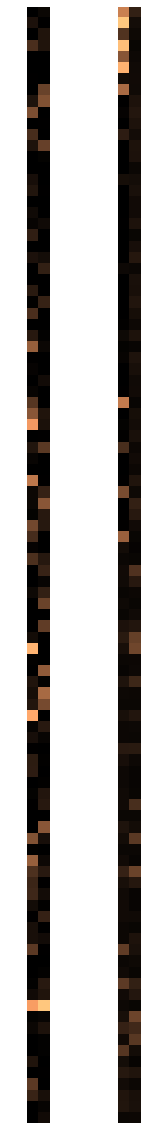

In [231]:
fi = plt.figure(figsize=(3,20))
ax = plt.subplot(1,2,1)
ax.axis('off')
ax.imshow((z_2), interpolation='nearest', cmap=plt.cm.copper)
ax = plt.subplot(1,2,2)
ax.axis('off')
ax.imshow((z_2_), interpolation='nearest', cmap=plt.cm.copper)
print np.max(z_2)
print np.max(z_2_)

20.8093553036
80.0775


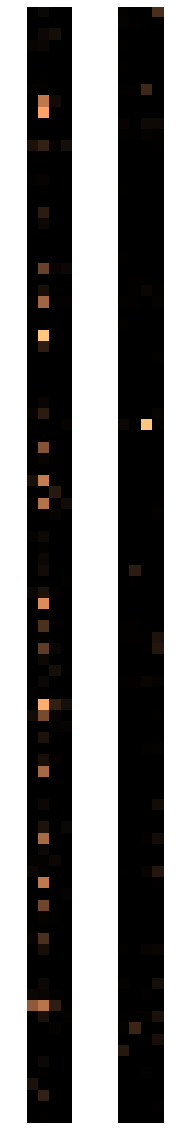

In [232]:
fi = plt.figure(figsize=(3,20))
ax = plt.subplot(1,2,1)
ax.axis('off')
ax.imshow((z_1), interpolation='nearest', cmap=plt.cm.copper)
ax = plt.subplot(1,2,2)
ax.axis('off')
ax.imshow((z_1_), interpolation='nearest', cmap=plt.cm.copper)
print np.max(z_1)
print np.max(z_1_)

In [163]:
datadict = pystan.misc.read_rdump('sparse_gamma_def.data.R')

datadict['x_heldout'] = datadict['x']

S = 25
datadict['S'] = S


In [169]:
intermediate_samples = np.genfromtxt('intermediate_variational_samples_10000.csv', delimiter=',')[:,1:]
print intermediate_samples.shape

z_1_ = np.ones((S,N,K_1))
W_0_ = np.ones((S,K_1,I))

# for s in range(S):
#     z_1_[s,:,:] = gamma(shape=alpha_z1, scale=1/(alpha_z1/np.dot(z_2, W_1)), size=(N,K_1))
#     W_0_[s,:,:] = gamma(shape=alpha_w0, scale=1/beta_w0, size=(K_1, I))

for s in range(S):
    z_1_[s,:,:] = np.reshape(intermediate_samples[s, N*K_2 : N*K_2+N*K_1], (N,K_1), order='F')
    W_0_[s,:,:] = np.reshape(intermediate_samples[s, N*K_2+N*K_1+K_2*K_1 : N*K_2+N*K_1+K_2*K_1+K_1*I], (K_1,I), order='F')

datadict['z_1'] = z_1_
datadict['W_0'] = W_0_

pystan.misc.stan_rdump(datadict, 'logpred.data.R')

# z_1_ = np.reshape(results[N*K_2 : N*K_2+N*K_1], (N,K_1), order='F')
# W_0_ = np.reshape(results[N*K_2+N*K_1+K_2*K_1 : N*K_2+N*K_1+K_2*K_1+K_1*I], (K_1,I), order='F')

(25, 308)
